In [1]:
#ALL IMPORT STATEMENTS 
import pandas as panda
import seaborn as sns 
import numpy as np
from time import time
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import LabelBinarizer
#from mlxtend.plotting import plot_confusion_matrix


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#Imports for selecting models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score
#Imports for data handling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
#Imports for profiling 
# import pandas_profiling as pp
from IPython.display import IFrame
#imports for ploting
from sklearn.model_selection import learning_curve

warnings.filterwarnings('ignore')

#DATA LOAD AND CHECK
raw_data = panda.read_csv('fetal_health.csv')

raw_data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

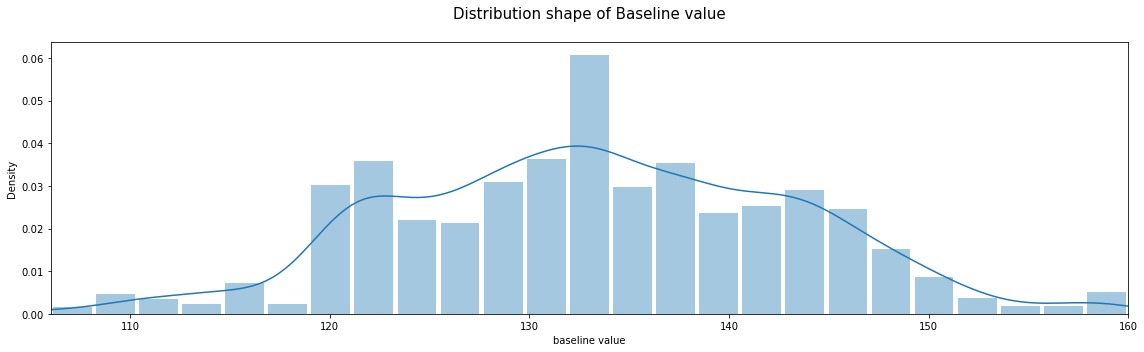

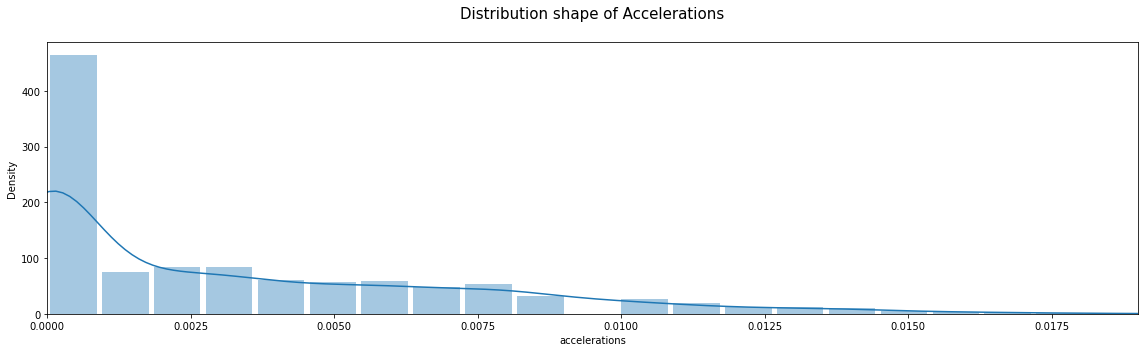

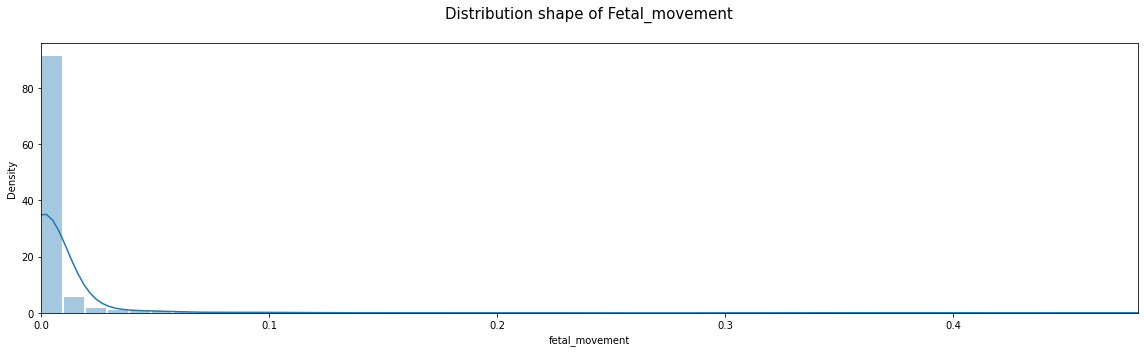

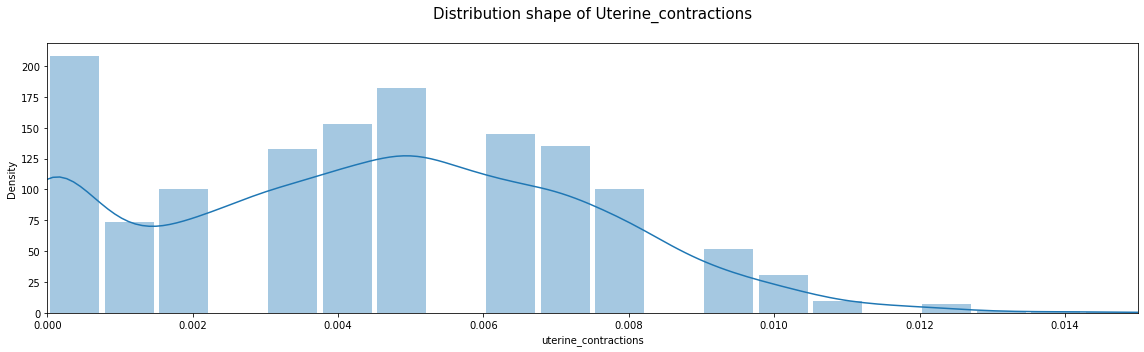

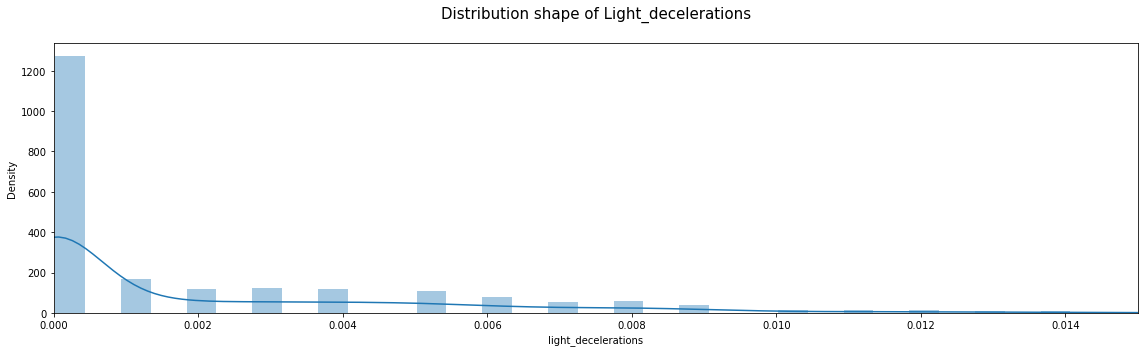

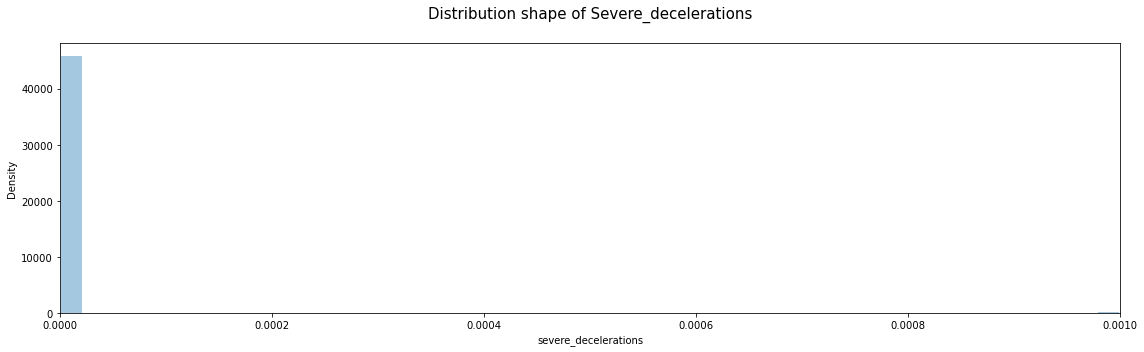

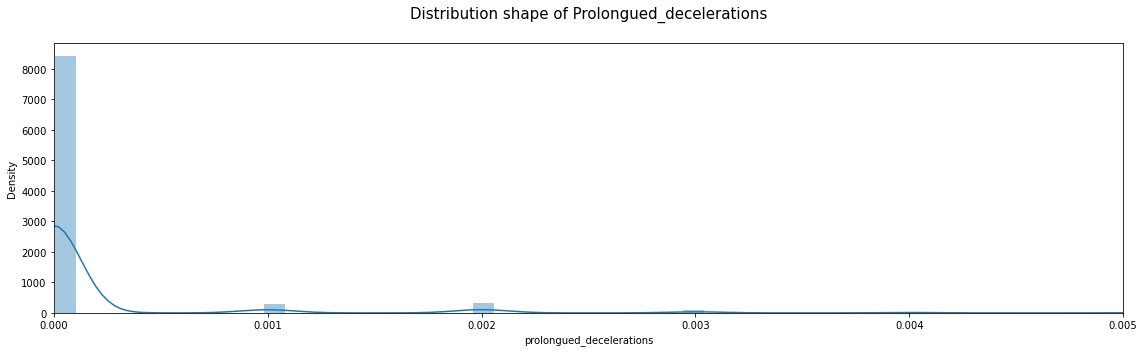

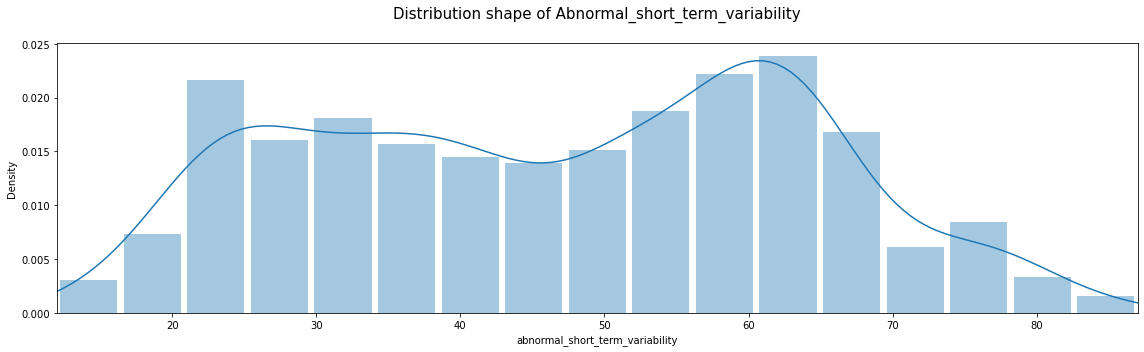

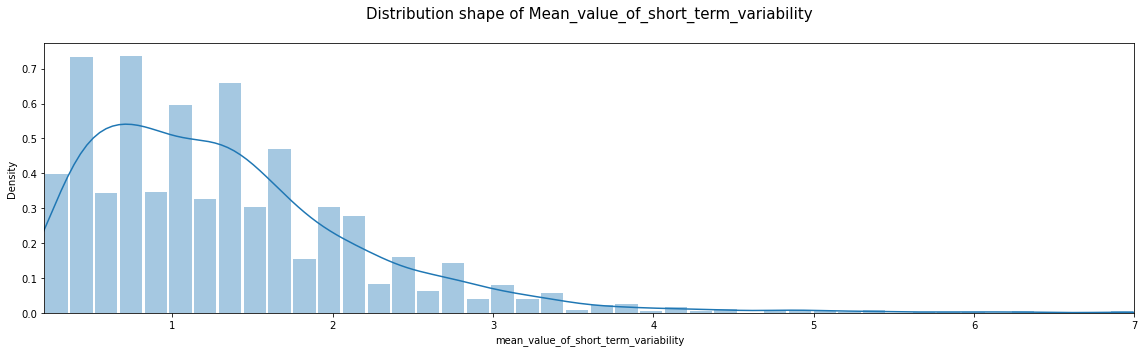

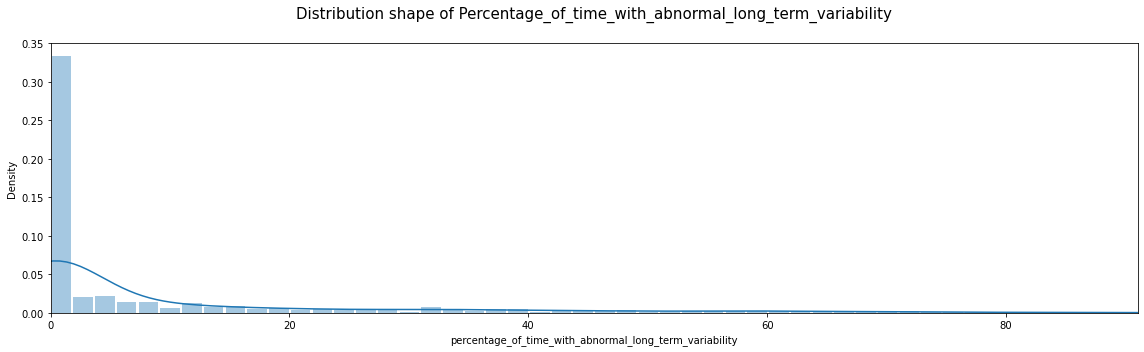

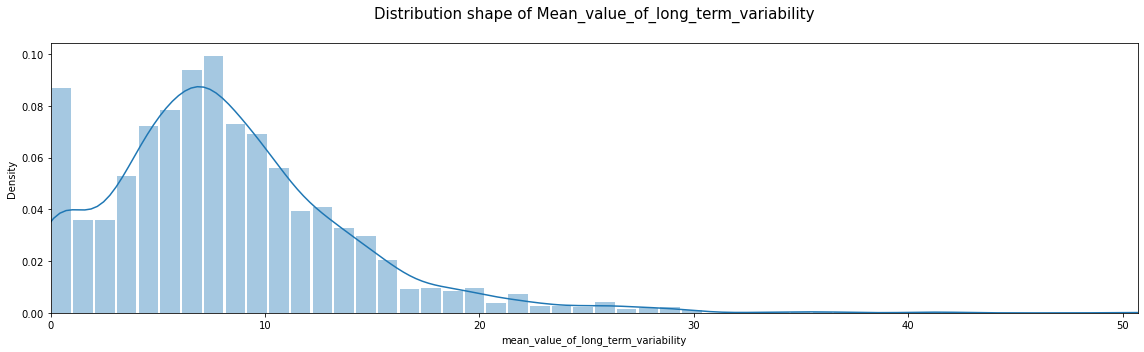

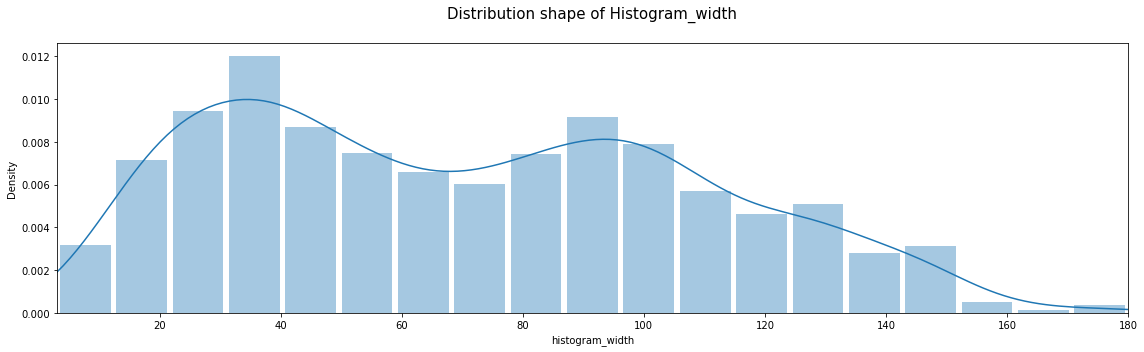

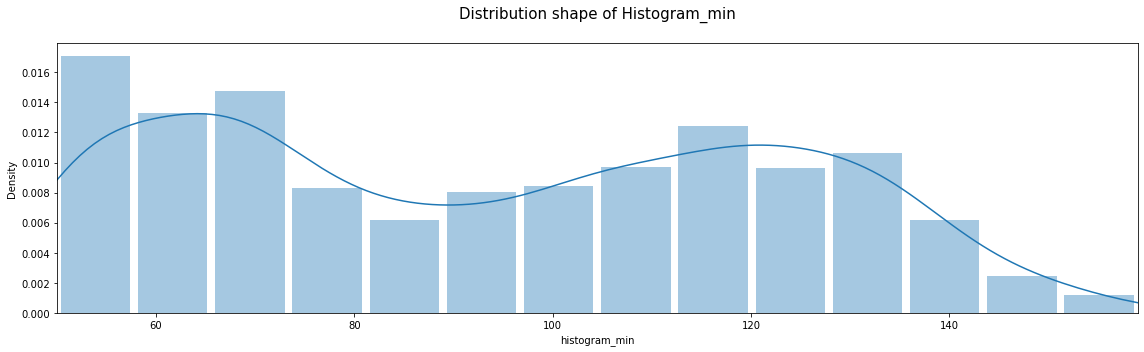

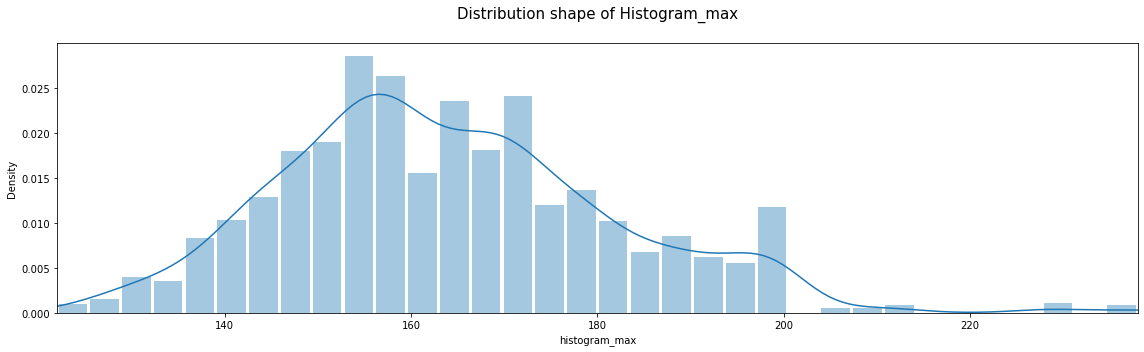

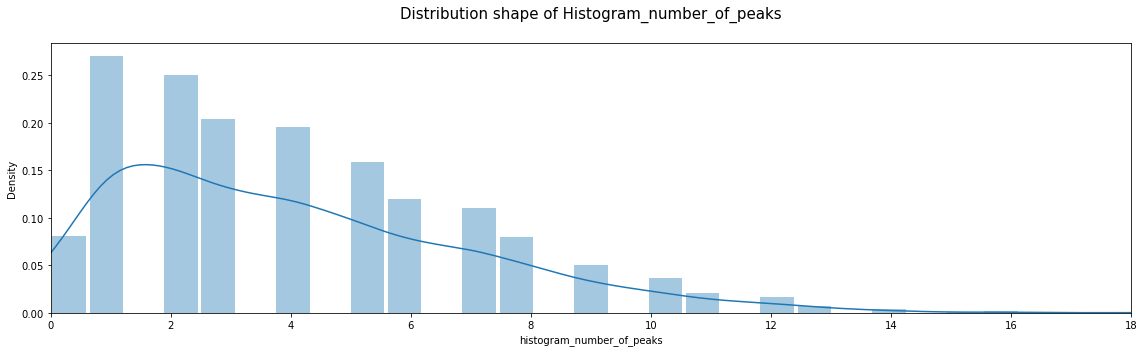

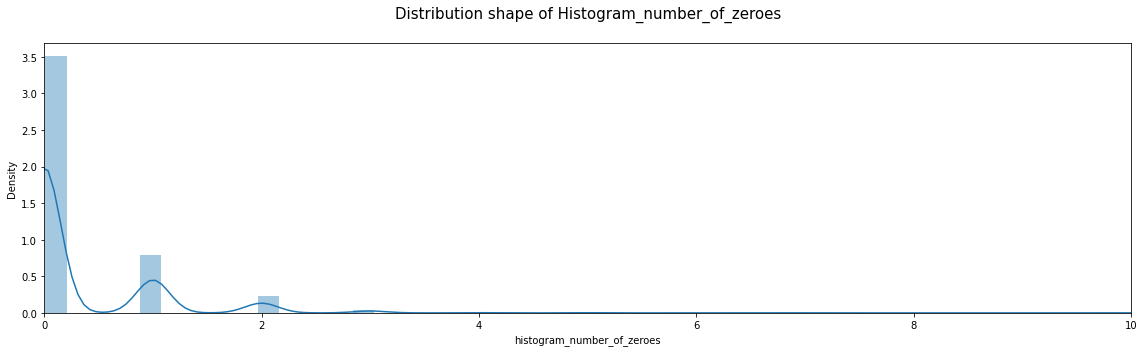

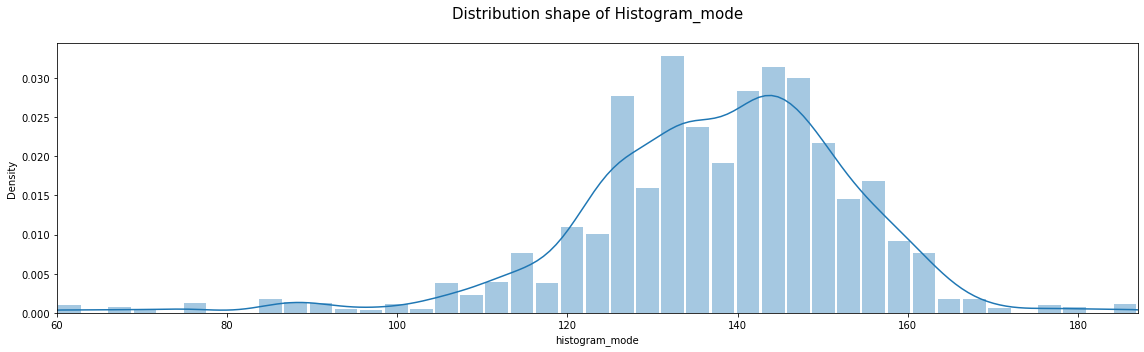

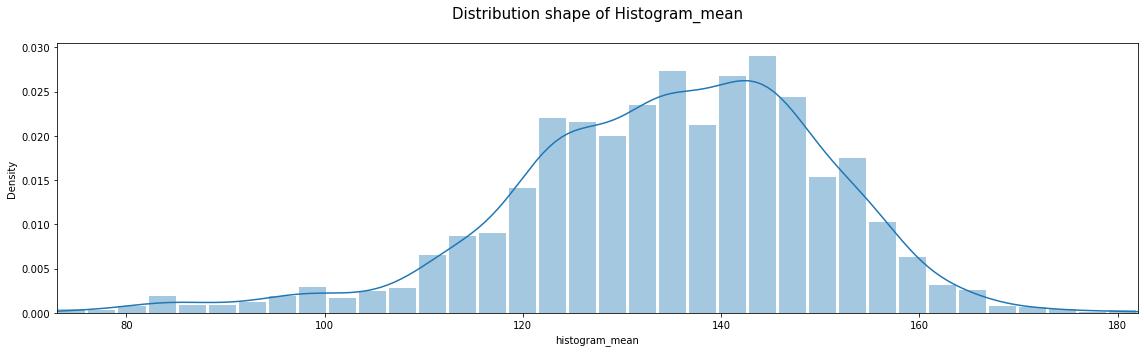

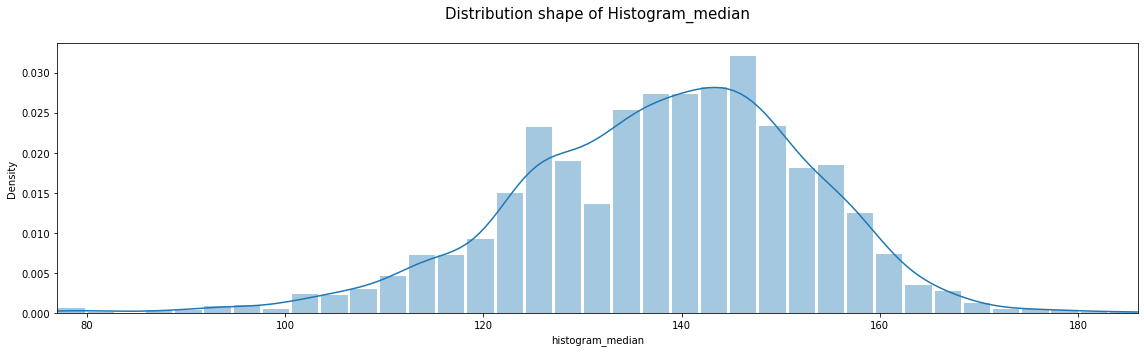

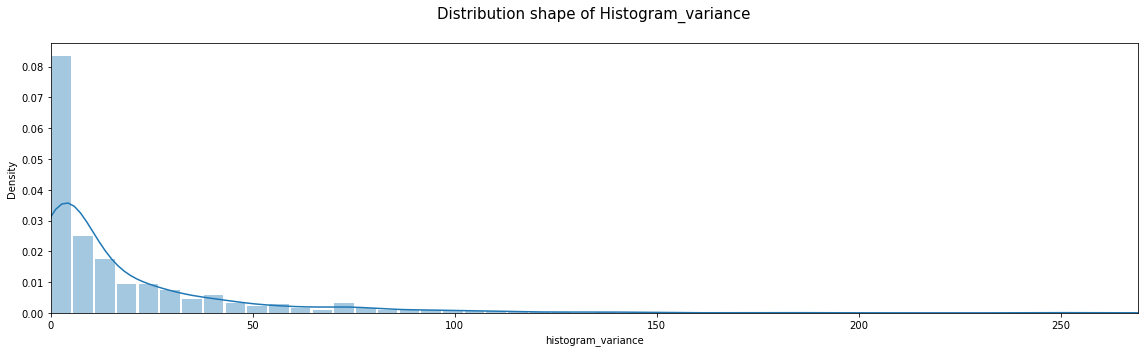

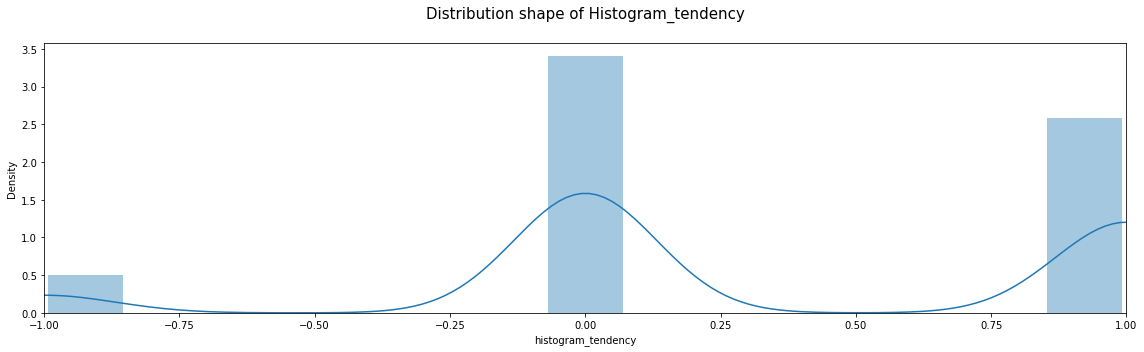

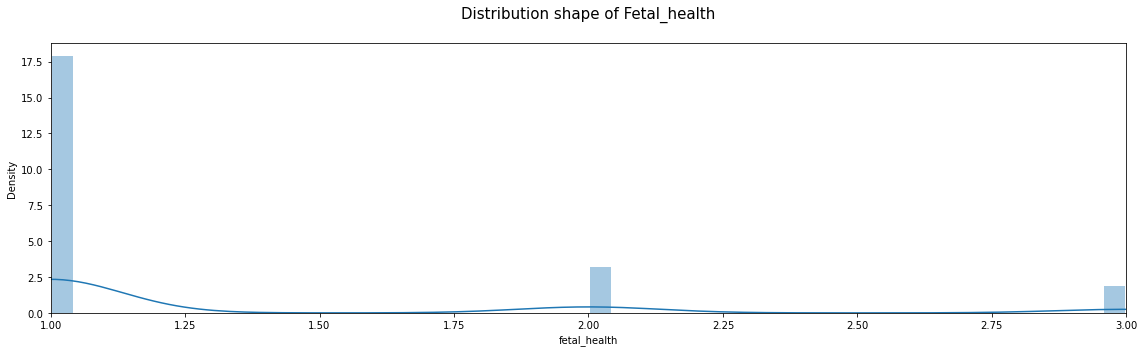

In [2]:
#Distribution and skewness of each feature
for feature in raw_data.select_dtypes("number").columns:
    
    plt.figure(figsize=(16,5))
    sns.distplot(raw_data[feature], hist_kws={"rwidth": 0.9})
    plt.xlim(raw_data[feature].min(), raw_data[feature].max())
    plt.title(f"Distribution shape of {feature.capitalize()}\n", fontsize=15)
    plt.tight_layout()
    plt.show()

In [28]:
##########ALL UTILS METHODS##############
from sklearn.metrics import plot_roc_curve,roc_curve 

#METHOD FOR PLOTING LEARNING CURVE OF EACH MODEL
def plot_learning_curves(model,X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=X_train, 
                                                            y=y_train,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.6, 1.0])
    plt.show()
    
#METHOD TO EVALUATE MODEL AND ITS PROPERTIES
def evaluate_model(clf, X_test, y_test, model_name, oversample_type,croos_f1,croos_precision,croos_recall):
    
    start_time = time()
    y_pred = clf.predict(X_test)
    unique, counts = np.unique(y_pred, return_counts=True)
    print(dict(zip(unique, counts)))
    print("Time for testing the model= %s seconds ---" % (time() - start_time))
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    plot_confusion_matrix(y_test, y_pred,model_name)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("F1 Score ", f1)
    print("Recall ", recall)
    print("Precision ", precision)
    return [model_name, oversample_type, f1, recall, precision, croos_f1,  croos_precision, croos_recall]

def plot_confusion_matrix(y_test, y_pred,model_name):
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "BuGn");
    ax.set_xlabel("Predicted labels");
    ax.set_ylabel("True labels"); 
    ax.set_title("Confusion Matrix of " +model_name); 
    ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);
#     acc_score = accuracy_score(y_test, y_pred)
    
#     cm = confusion_matrix(y_test, y_pred)
#     sns.heatmap(cm, annot=True, fmt="d")
#     #plt.title(f"Accuracy: {acc_score:0.3f}")
#     plt.
#     plt.xlabel("Predicted labels")
#     plt.ylabel("Actual labels")
    plt.show()

#METHOD TO PLOT ROC CURVE
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [4]:
raw_data.describe().T
##data.isnull().sum()

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [5]:
# # Profile Report
# FetalHealthReport = pp.ProfileReport(raw_data)
# FetalHealthReport.to_file('FetalhealthReprt.html')
# display(IFrame('FetalhealthReprt.html', width=900, height=350))

In [6]:
# removing duplicates from the dataset
no_duplicate = raw_data.copy()
no_duplicate.drop_duplicates(inplace=True)
no_duplicate
print(raw_data.info(),no_duplicate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

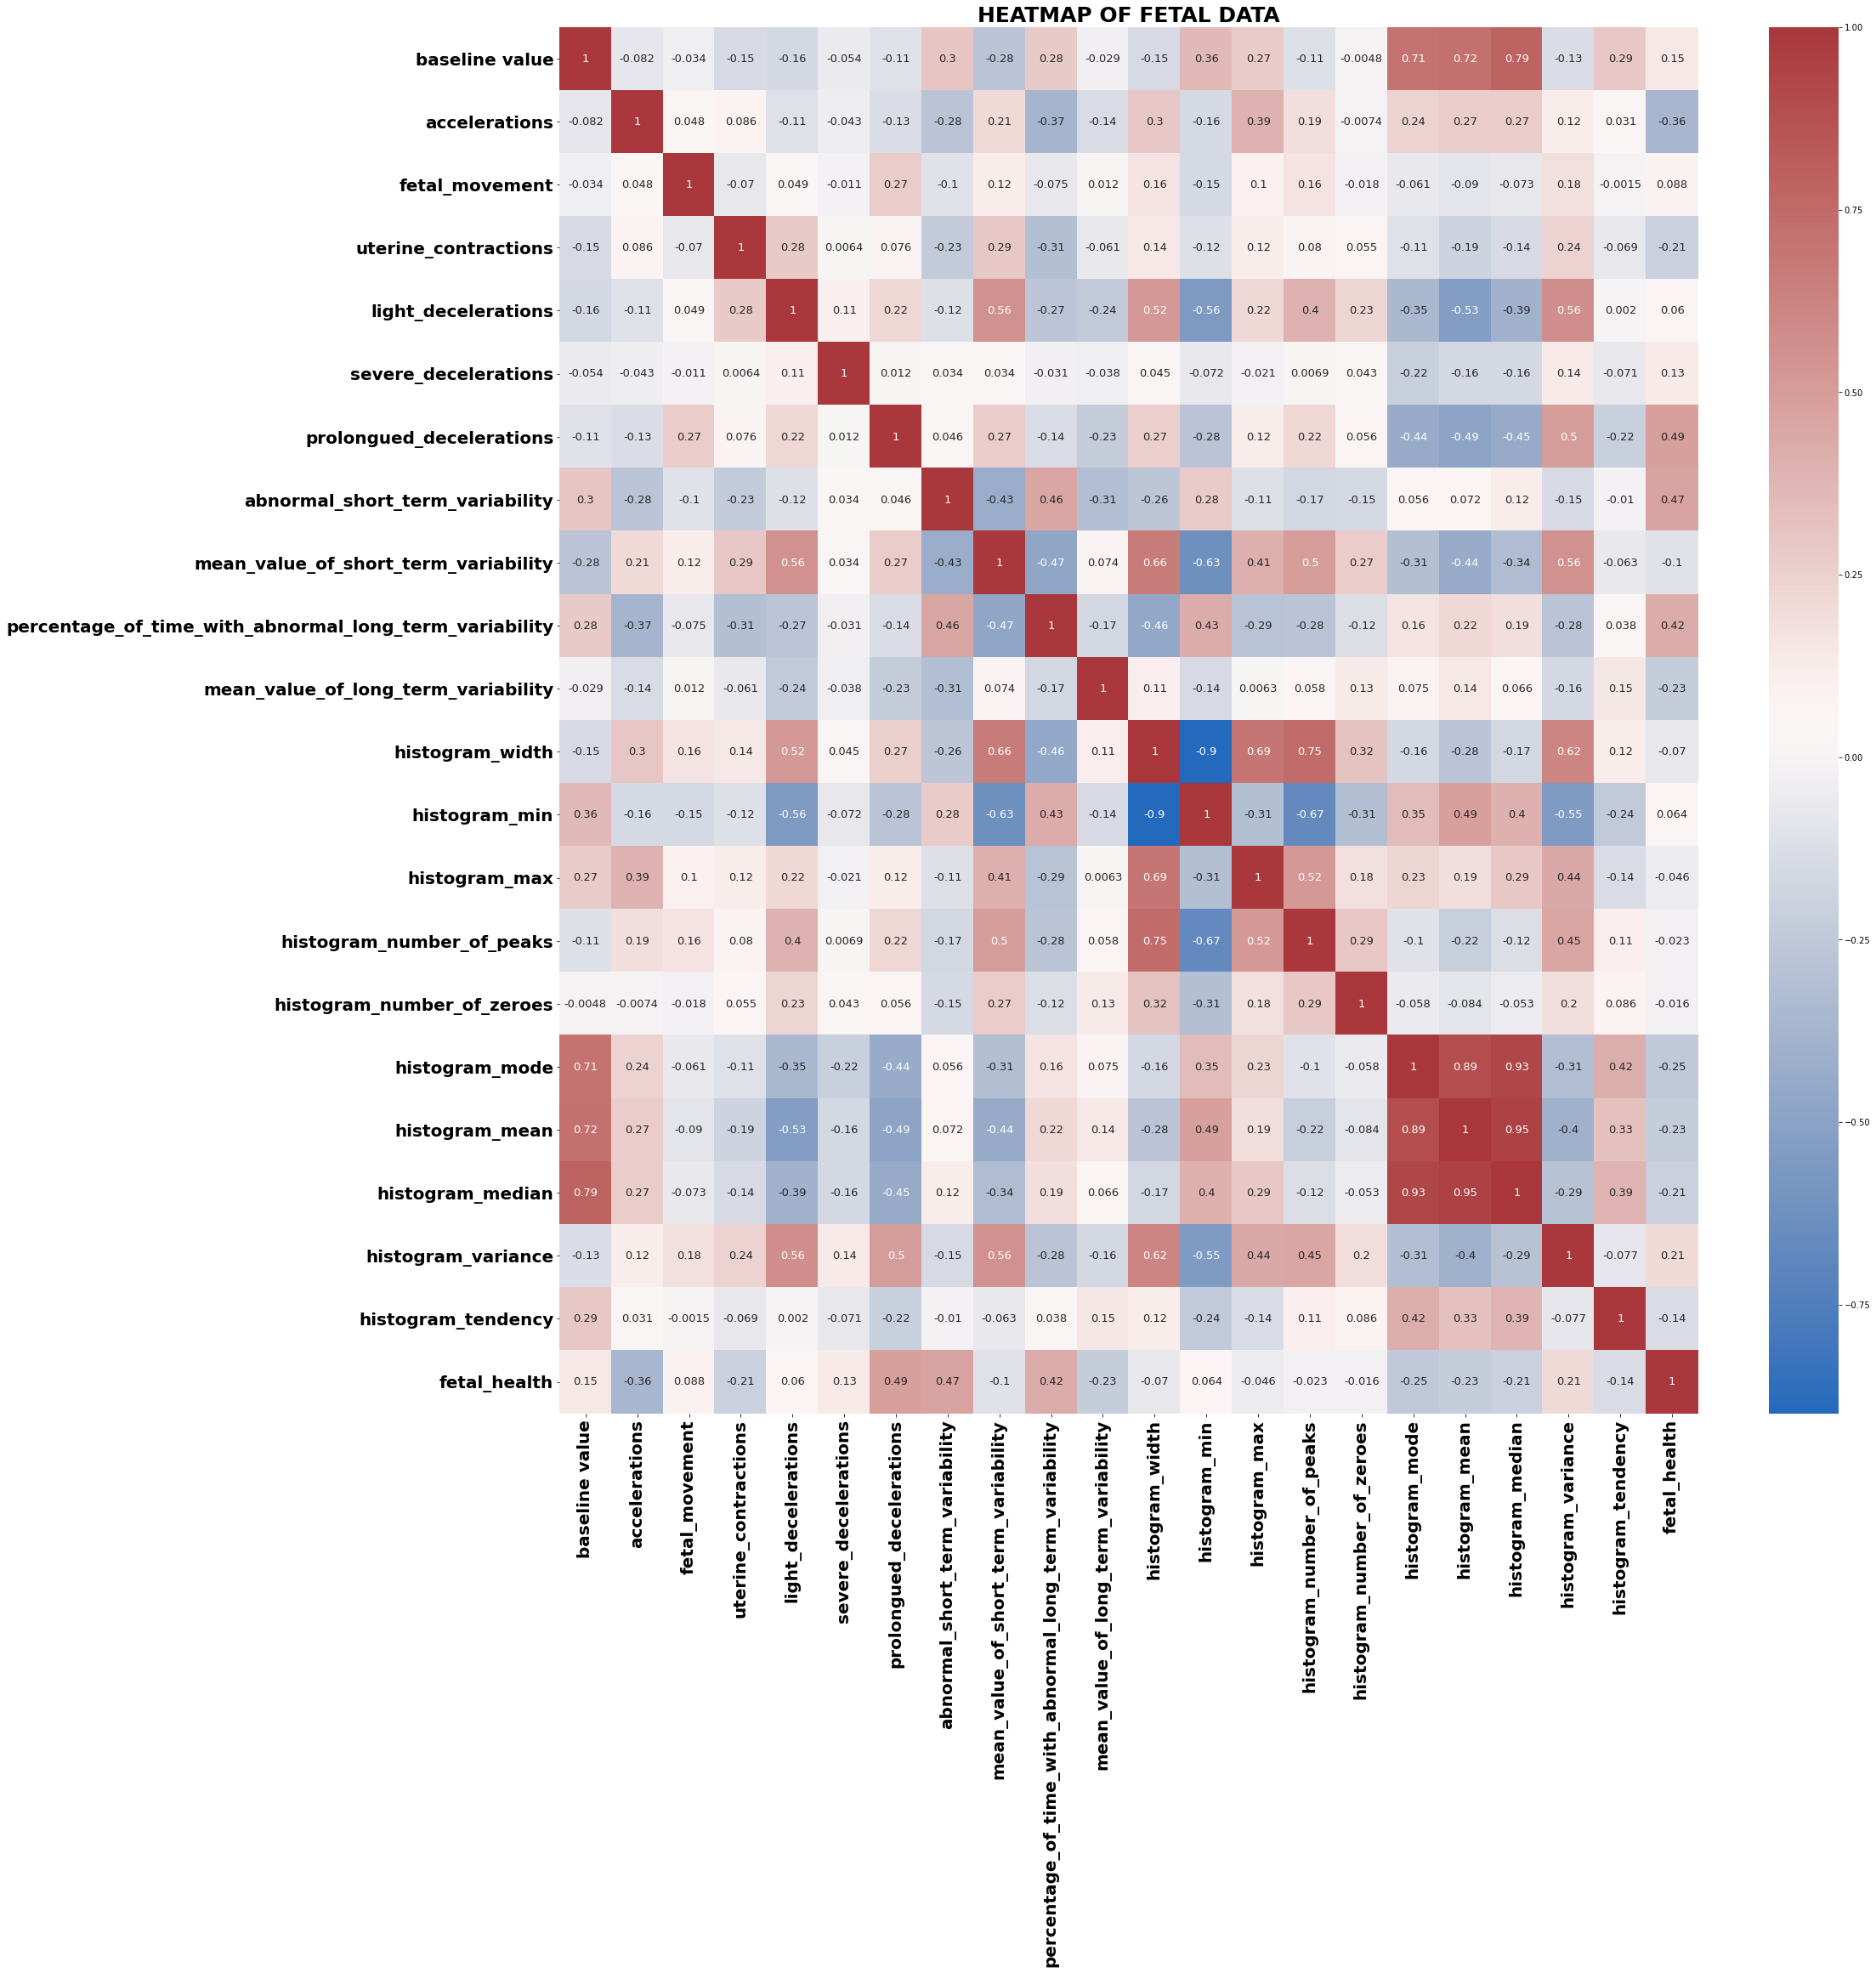

In [7]:
plt.figure(figsize=(30,30))
plt.title("HEATMAP OF FETAL DATA",fontsize=25,fontweight='bold')
sns.heatmap(no_duplicate.corr(), cmap="vlag",annot=True,annot_kws={'size':13})
plt.yticks(fontweight='bold',fontsize=20)
plt.xticks(fontweight='bold',fontsize=20)
plt.show()


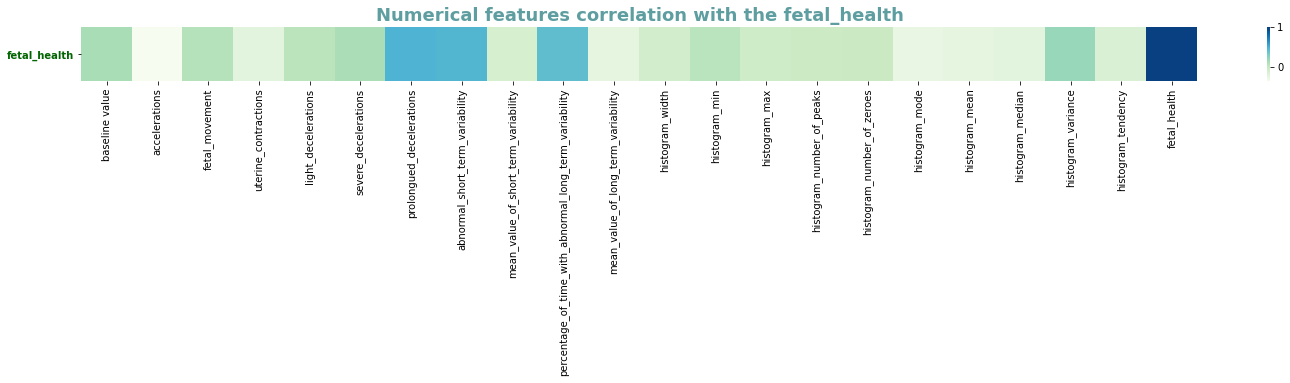

In [8]:
numeric_data = no_duplicate.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=18, color="#5F9EA0")
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

In [9]:
Num_feature = numeric_corr["fetal_health"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = Num_feature.style.background_gradient(cmap=cm)
style

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.486752
abnormal_short_term_variability,0.469671
percentage_of_time_with_abnormal_long_term_variability,0.421634
histogram_variance,0.208171
baseline value,0.146077
severe_decelerations,0.132408
fetal_movement,0.088057
histogram_min,0.063529
light_decelerations,0.059651


NORMAL          1646
SUSPECT          292
PATHOLOGICAL     175
Name: fetal_health, dtype: int64


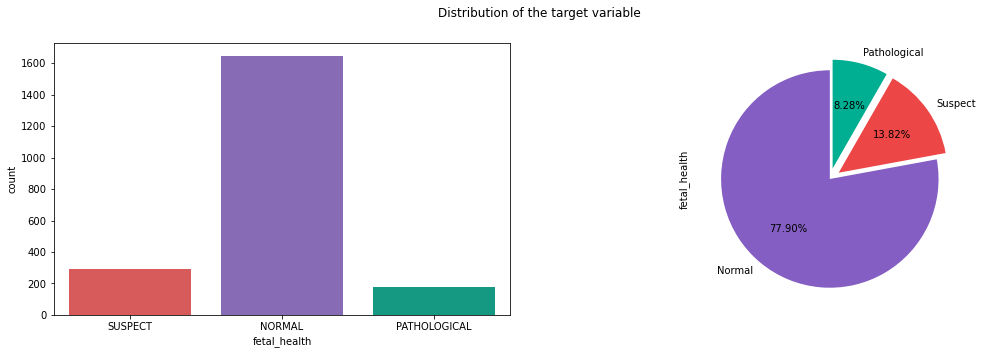

In [10]:
data_plot = no_duplicate.copy()
data_plot['fetal_health'] = data_plot['fetal_health'].replace({
        1.0: "NORMAL",
        2.0: "SUSPECT",
        3.0: "PATHOLOGICAL"
    })

print(data_plot['fetal_health'].value_counts())
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(x=data_plot['fetal_health'], palette=['#ec4646','#845ec2','#00af91'])
plt.subplot(1,2,2)
data_plot['fetal_health'].value_counts().plot(kind='pie', autopct='%.2f%%', explode=[0,0.1,0.1], 
                                       startangle=90, colors=['#845ec2','#ec4646','#00af91'],
                                      labels = ['Normal','Suspect','Pathological'])
plt.suptitle('Distribution of the target variable')
plt.show()

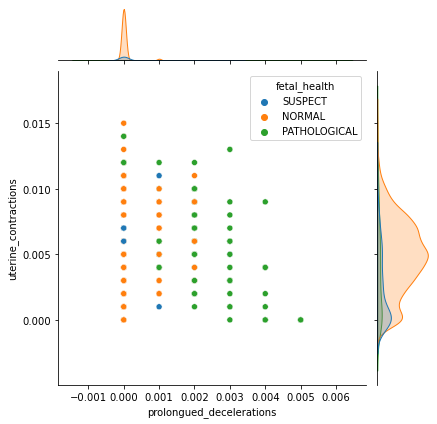

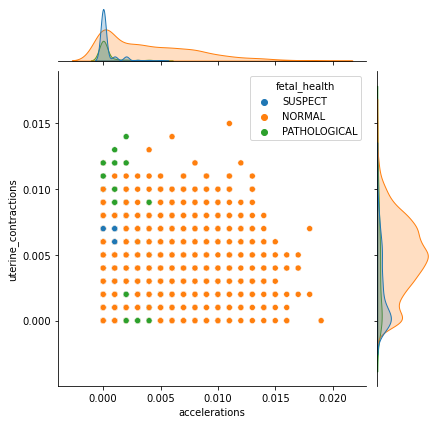

In [11]:
sns.jointplot(x="prolongued_decelerations", y="uterine_contractions", data=data_plot, hue="fetal_health")
sns.jointplot(x="accelerations", y="uterine_contractions", data=data_plot, hue="fetal_health")

In [12]:
scaler = StandardScaler()
target = no_duplicate.fetal_health
X = no_duplicate.drop(["fetal_health"],axis=1)
std_X = scaler.fit_transform(X)
X_train, X_test, y_train,y_test = train_test_split(std_X, target, test_size=0.20, random_state=45)
X_train_raw, X_test_raw, y_train_raw,y_test_raw = train_test_split(X, target, test_size=0.20, random_state=45)
print(len(X_train), len(X_test))
smt = SMOTE()
ada = ADASYN(random_state=130)
smenn = SMOTEENN()

X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
print(len(X_train_sm))
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
print(len(X_train_ada))
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)
print(len(X_train_smenn))

1690 423
3936
3927
3682


In [13]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

crossV_Method = StratifiedKFold(n_splits=4, random_state=42,shuffle =True)
# scoring_strings = ['accuracy', 'precision', 'recall', 'f1', 'average_precision', 'roc_auc']


In [14]:
models = {
#     "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=10000),
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=10000,activation = 'relu',solver='adam',random_state=1),
#     "K-Nearest Neighbors": KNeighborsClassifier(metric='euclidean'),
    'DecisionTrees': DecisionTreeClassifier(random_state=42),
    'RandomForest':RandomForestClassifier(random_state=42),
#     'LinearSVC':LinearSVC(random_state=0),
#     'AdaBoostClassifier':AdaBoostClassifier(random_state=42),
#     'SGD':SGDClassifier()
}
oversampled_data = {
#     'RAW':[X_train_raw, y_train_raw],
    'ACTUAL':[X_train, y_train],
    'SMOTE':[X_train_sm, y_train_sm],
    'ADASYN':[X_train_ada, y_train_ada],
    'SMOTE_ENN':[X_train_smenn, y_train_smenn]
}

--------------------------------------------
Model  Logistic Regression
Data Type  ACTUAL
Time for training the model= 0.04700016975402832 seconds ---


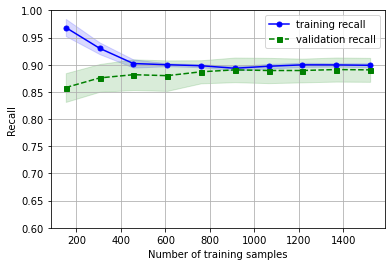

{1.0: 337, 2.0: 59, 3.0: 27}
Time for testing the model= 0.0010004043579101562 seconds ---


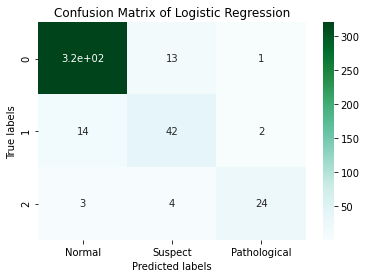

[[320  13   1]
 [ 14  42   2]
 [  3   4  24]]
              precision    recall  f1-score   support

         1.0       0.95      0.96      0.95       334
         2.0       0.71      0.72      0.72        58
         3.0       0.89      0.77      0.83        31

    accuracy                           0.91       423
   macro avg       0.85      0.82      0.83       423
weighted avg       0.91      0.91      0.91       423

F1 Score  0.912211578268853
Recall  0.9125295508274232
Precision  0.9125177930504694
--------------------------------------------
Model  Logistic Regression
Data Type  SMOTE
Time for training the model= 0.17199993133544922 seconds ---


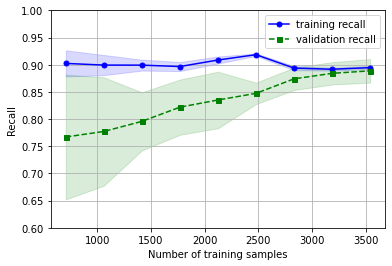

{1.0: 296, 2.0: 95, 3.0: 32}
Time for testing the model= 0.0010004043579101562 seconds ---


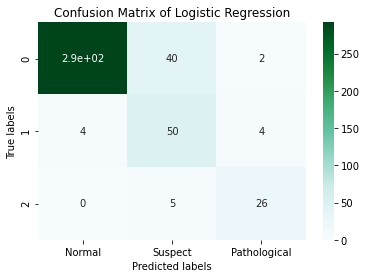

[[292  40   2]
 [  4  50   4]
 [  0   5  26]]
              precision    recall  f1-score   support

         1.0       0.99      0.87      0.93       334
         2.0       0.53      0.86      0.65        58
         3.0       0.81      0.84      0.83        31

    accuracy                           0.87       423
   macro avg       0.78      0.86      0.80       423
weighted avg       0.91      0.87      0.88       423

F1 Score  0.8820531837636552
Recall  0.8699763593380615
Precision  0.9106390124727192
--------------------------------------------
Model  Logistic Regression
Data Type  ADASYN
Time for training the model= 0.09199976921081543 seconds ---


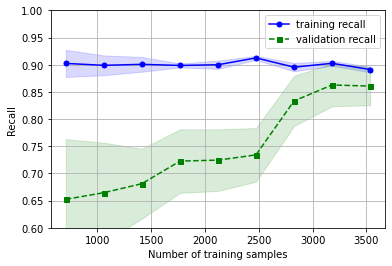

{1.0: 288, 2.0: 93, 3.0: 42}
Time for testing the model= 0.0009999275207519531 seconds ---


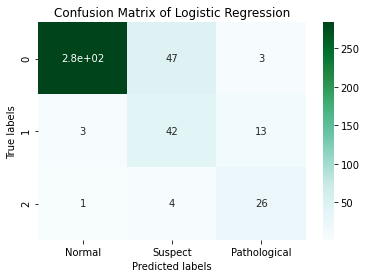

[[284  47   3]
 [  3  42  13]
 [  1   4  26]]
              precision    recall  f1-score   support

         1.0       0.99      0.85      0.91       334
         2.0       0.45      0.72      0.56        58
         3.0       0.62      0.84      0.71        31

    accuracy                           0.83       423
   macro avg       0.69      0.80      0.73       423
weighted avg       0.89      0.83      0.85       423

F1 Score  0.8495279146032085
Recall  0.8321513002364066
Precision  0.8859223065926338
--------------------------------------------
Model  Logistic Regression
Data Type  SMOTE_ENN
Time for training the model= 0.11738777160644531 seconds ---


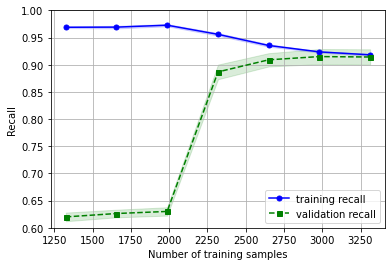

{1.0: 286, 2.0: 101, 3.0: 36}
Time for testing the model= 0.0010013580322265625 seconds ---


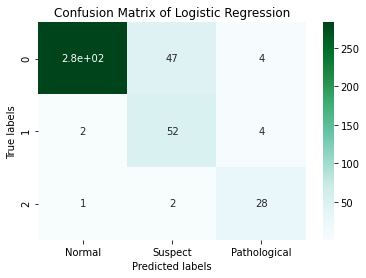

[[283  47   4]
 [  2  52   4]
 [  1   2  28]]
              precision    recall  f1-score   support

         1.0       0.99      0.85      0.91       334
         2.0       0.51      0.90      0.65        58
         3.0       0.78      0.90      0.84        31

    accuracy                           0.86       423
   macro avg       0.76      0.88      0.80       423
weighted avg       0.91      0.86      0.87       423

F1 Score  0.8717665061437064
Recall  0.8581560283687943
Precision  0.9089101672487669
--------------------------------------------
Model  Neural Network
Data Type  ACTUAL
Time for training the model= 1.546020746231079 seconds ---


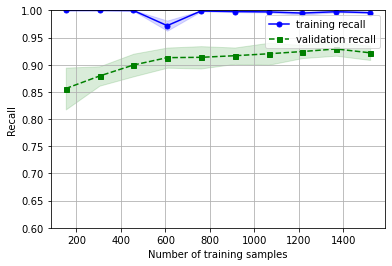

{1.0: 339, 2.0: 53, 3.0: 31}
Time for testing the model= 0.0009989738464355469 seconds ---


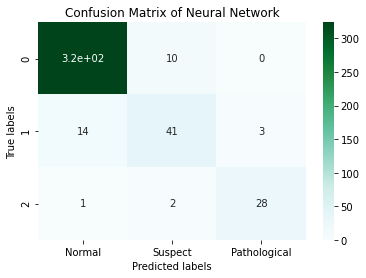

[[324  10   0]
 [ 14  41   3]
 [  1   2  28]]
              precision    recall  f1-score   support

         1.0       0.96      0.97      0.96       334
         2.0       0.77      0.71      0.74        58
         3.0       0.90      0.90      0.90        31

    accuracy                           0.93       423
   macro avg       0.88      0.86      0.87       423
weighted avg       0.93      0.93      0.93       423

F1 Score  0.9277534624188224
Recall  0.9290780141843972
Precision  0.9269247363270804
--------------------------------------------
Model  Neural Network
Data Type  SMOTE
Time for training the model= 3.178865671157837 seconds ---


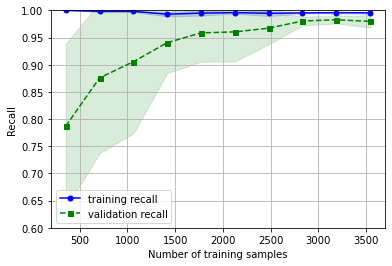

{1.0: 328, 2.0: 64, 3.0: 31}
Time for testing the model= 0.002000093460083008 seconds ---


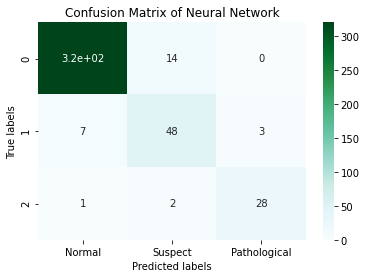

[[320  14   0]
 [  7  48   3]
 [  1   2  28]]
              precision    recall  f1-score   support

         1.0       0.98      0.96      0.97       334
         2.0       0.75      0.83      0.79        58
         3.0       0.90      0.90      0.90        31

    accuracy                           0.94       423
   macro avg       0.88      0.90      0.89       423
weighted avg       0.94      0.94      0.94       423

F1 Score  0.937445972522692
Recall  0.9361702127659575
Precision  0.9393703511503201
--------------------------------------------
Model  Neural Network
Data Type  ADASYN
Time for training the model= 2.1187918186187744 seconds ---


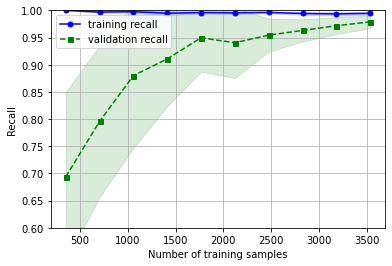

{1.0: 343, 2.0: 51, 3.0: 29}
Time for testing the model= 0.0019996166229248047 seconds ---


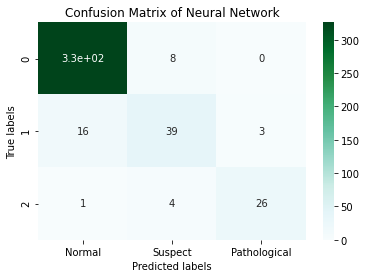

[[326   8   0]
 [ 16  39   3]
 [  1   4  26]]
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       334
         2.0       0.76      0.67      0.72        58
         3.0       0.90      0.84      0.87        31

    accuracy                           0.92       423
   macro avg       0.87      0.83      0.85       423
weighted avg       0.92      0.92      0.92       423

F1 Score  0.9220742981584047
Recall  0.9243498817966903
Precision  0.9210215337226672
--------------------------------------------
Model  Neural Network
Data Type  SMOTE_ENN
Time for training the model= 2.082976818084717 seconds ---


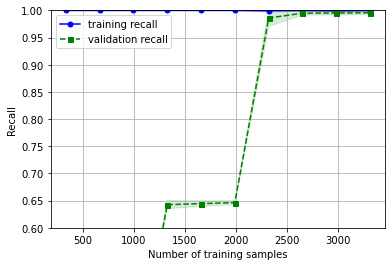

{1.0: 309, 2.0: 85, 3.0: 29}
Time for testing the model= 0.0019991397857666016 seconds ---


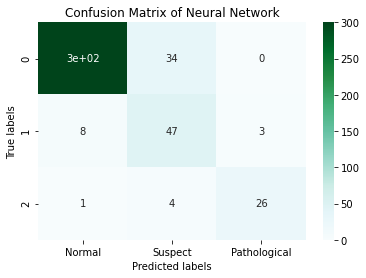

[[300  34   0]
 [  8  47   3]
 [  1   4  26]]
              precision    recall  f1-score   support

         1.0       0.97      0.90      0.93       334
         2.0       0.55      0.81      0.66        58
         3.0       0.90      0.84      0.87        31

    accuracy                           0.88       423
   macro avg       0.81      0.85      0.82       423
weighted avg       0.91      0.88      0.89       423

F1 Score  0.8904411712591455
Recall  0.8817966903073287
Precision  0.9081218353280477
--------------------------------------------
Model  DecisionTrees
Data Type  ACTUAL
Time for training the model= 0.010001420974731445 seconds ---


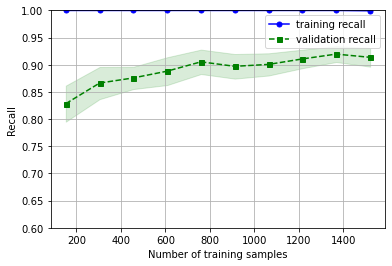

{1.0: 336, 2.0: 58, 3.0: 29}
Time for testing the model= 0.0 seconds ---


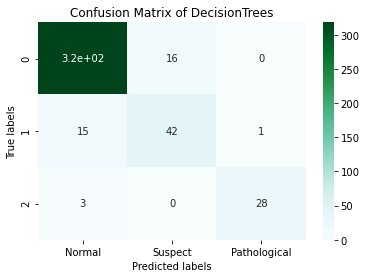

[[318  16   0]
 [ 15  42   1]
 [  3   0  28]]
              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       334
         2.0       0.72      0.72      0.72        58
         3.0       0.97      0.90      0.93        31

    accuracy                           0.92       423
   macro avg       0.88      0.86      0.87       423
weighted avg       0.92      0.92      0.92       423

F1 Score  0.917220046340402
Recall  0.91725768321513
Precision  0.9173479369737623
--------------------------------------------
Model  DecisionTrees
Data Type  SMOTE
Time for training the model= 0.028000354766845703 seconds ---


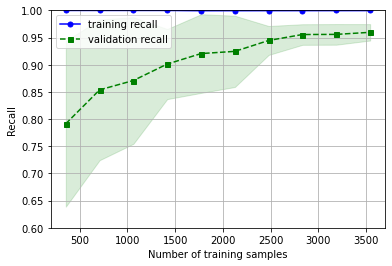

{1.0: 322, 2.0: 72, 3.0: 29}
Time for testing the model= 0.0 seconds ---


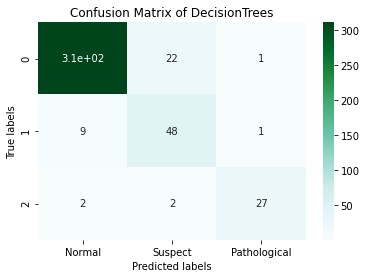

[[311  22   1]
 [  9  48   1]
 [  2   2  27]]
              precision    recall  f1-score   support

         1.0       0.97      0.93      0.95       334
         2.0       0.67      0.83      0.74        58
         3.0       0.93      0.87      0.90        31

    accuracy                           0.91       423
   macro avg       0.85      0.88      0.86       423
weighted avg       0.92      0.91      0.92       423

F1 Score  0.9158860369291091
Recall  0.9125295508274232
Precision  0.9222666613332983
--------------------------------------------
Model  DecisionTrees
Data Type  ADASYN
Time for training the model= 0.0289914608001709 seconds ---


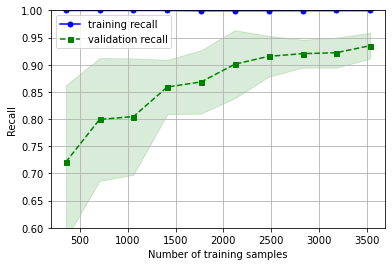

{1.0: 324, 2.0: 69, 3.0: 30}
Time for testing the model= 0.0010025501251220703 seconds ---


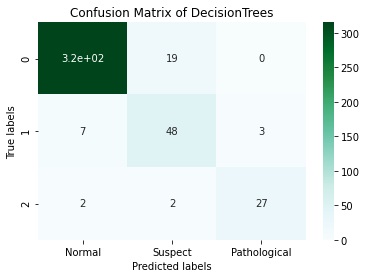

[[315  19   0]
 [  7  48   3]
 [  2   2  27]]
              precision    recall  f1-score   support

         1.0       0.97      0.94      0.96       334
         2.0       0.70      0.83      0.76        58
         3.0       0.90      0.87      0.89        31

    accuracy                           0.92       423
   macro avg       0.86      0.88      0.87       423
weighted avg       0.93      0.92      0.92       423

F1 Score  0.924520985055348
Recall  0.9219858156028369
Precision  0.9290072064046778
--------------------------------------------
Model  DecisionTrees
Data Type  SMOTE_ENN
Time for training the model= 0.02699875831604004 seconds ---


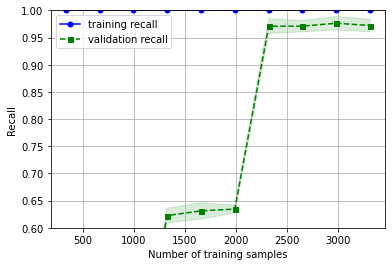

{1.0: 306, 2.0: 86, 3.0: 31}
Time for testing the model= 0.000997781753540039 seconds ---


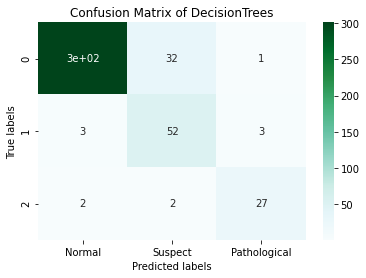

[[301  32   1]
 [  3  52   3]
 [  2   2  27]]
              precision    recall  f1-score   support

         1.0       0.98      0.90      0.94       334
         2.0       0.60      0.90      0.72        58
         3.0       0.87      0.87      0.87        31

    accuracy                           0.90       423
   macro avg       0.82      0.89      0.84       423
weighted avg       0.92      0.90      0.91       423

F1 Score  0.9055736143945363
Recall  0.8983451536643026
Precision  0.9234332177352037
--------------------------------------------
Model  RandomForest
Data Type  ACTUAL
Time for training the model= 0.20799970626831055 seconds ---


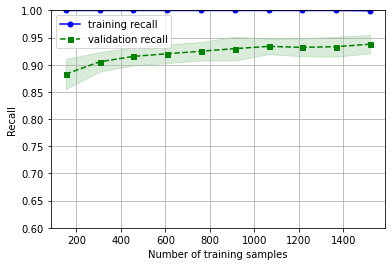

{1.0: 343, 2.0: 52, 3.0: 28}
Time for testing the model= 0.009001731872558594 seconds ---


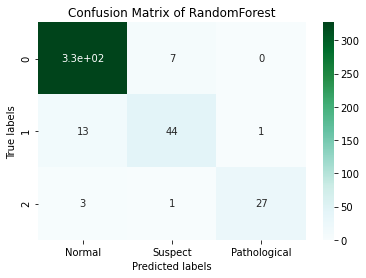

[[327   7   0]
 [ 13  44   1]
 [  3   1  27]]
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.97       334
         2.0       0.85      0.76      0.80        58
         3.0       0.96      0.87      0.92        31

    accuracy                           0.94       423
   macro avg       0.92      0.87      0.89       423
weighted avg       0.94      0.94      0.94       423

F1 Score  0.9395408078260931
Recall  0.9408983451536643
Precision  0.9394553316611503
--------------------------------------------
Model  RandomForest
Data Type  SMOTE
Time for training the model= 0.43601512908935547 seconds ---


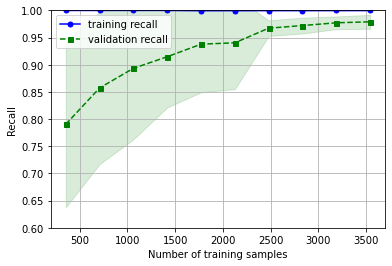

{1.0: 333, 2.0: 60, 3.0: 30}
Time for testing the model= 0.010035276412963867 seconds ---


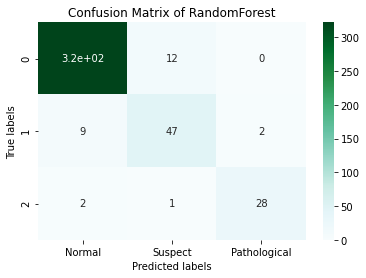

[[322  12   0]
 [  9  47   2]
 [  2   1  28]]
              precision    recall  f1-score   support

         1.0       0.97      0.96      0.97       334
         2.0       0.78      0.81      0.80        58
         3.0       0.93      0.90      0.92        31

    accuracy                           0.94       423
   macro avg       0.89      0.89      0.89       423
weighted avg       0.94      0.94      0.94       423

F1 Score  0.938877458261562
Recall  0.9385342789598109
Precision  0.9393230109542166
--------------------------------------------
Model  RandomForest
Data Type  ADASYN
Time for training the model= 0.4249570369720459 seconds ---


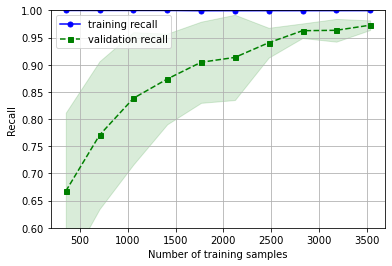

{1.0: 329, 2.0: 63, 3.0: 31}
Time for testing the model= 0.009999513626098633 seconds ---


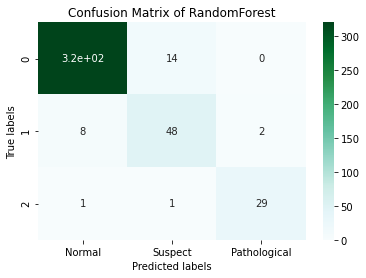

[[320  14   0]
 [  8  48   2]
 [  1   1  29]]
              precision    recall  f1-score   support

         1.0       0.97      0.96      0.97       334
         2.0       0.76      0.83      0.79        58
         3.0       0.94      0.94      0.94        31

    accuracy                           0.94       423
   macro avg       0.89      0.91      0.90       423
weighted avg       0.94      0.94      0.94       423

F1 Score  0.9395503591657876
Recall  0.9385342789598109
Precision  0.941025290957387
--------------------------------------------
Model  RandomForest
Data Type  SMOTE_ENN
Time for training the model= 0.38102078437805176 seconds ---


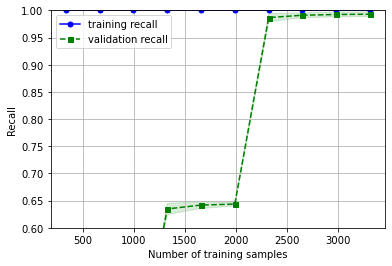

{1.0: 306, 2.0: 85, 3.0: 32}
Time for testing the model= 0.010038137435913086 seconds ---


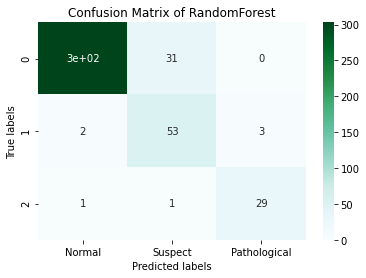

[[303  31   0]
 [  2  53   3]
 [  1   1  29]]
              precision    recall  f1-score   support

         1.0       0.99      0.91      0.95       334
         2.0       0.62      0.91      0.74        58
         3.0       0.91      0.94      0.92        31

    accuracy                           0.91       423
   macro avg       0.84      0.92      0.87       423
weighted avg       0.93      0.91      0.92       423

F1 Score  0.9167587222995023
Recall  0.9101654846335697
Precision  0.9337681940388449


In [29]:
final_output = []
n_jobs = 2
for model_k, model_clf in models.items():
    for data_type, data in oversampled_data.items():
        print('--------------------------------------------')
        print('Model ', model_k)
        print('Data Type ', data_type)
        croos_f1 = round(cross_val_score(model_clf, data[0], data[1], 
                                         cv=crossV_Method, scoring="f1_macro").mean(), 3)
#         croos_roc_auc = round(cross_val_score(model_clf, data[0], data[1], 
#                                               cv=crossV_Method, scoring="roc_auc_macro").mean(), 3)
        croos_precision = round(cross_val_score(model_clf, X_train_sm, y_train_sm, 
                                                cv=crossV_Method, scoring = "precision_macro").mean(), 3)
        croos_recall = round(cross_val_score(model_clf, data[0], data[1], 
                                             cv=crossV_Method, scoring="recall_macro").mean(), 3)
        start_time = time()
        model_clf.fit(data[0], data[1])
        print("Time for training the model= %s seconds ---" % (time() - start_time))
        plot_learning_curves(model_clf,data[0], data[1])
        final_output.append(evaluate_model(model_clf, X_test, y_test, model_k, data_type,
                                              croos_f1,croos_precision,croos_recall))

In [26]:
final_df = panda.DataFrame(final_output, columns=['Model', 'DataType', 'F1', 'Recall', 
                                                  'Precision','cross_f1',
#                                                   'croos_roc_auc',
                                                  'cross_precision','cross_recall'])

final_df.sort_values(by="F1", ascending=False)

,Model,DataType,F1,Recall,Precision,cross_f1,cross_precision,cross_recall
14,RandomForest,ADASYN,0.939550,0.938534,0.941025,0.980,0.974,0.980
12,RandomForest,ACTUAL,0.939541,0.940898,0.939455,0.871,0.974,0.849
13,RandomForest,SMOTE,0.938877,0.938534,0.939323,0.974,0.974,0.974
5,Neural Network,SMOTE,0.937446,0.936170,0.939370,0.976,0.977,0.976
4,Neural Network,ACTUAL,0.927753,0.929078,0.926925,0.858,0.977,0.856
10,DecisionTrees,ADASYN,0.924521,0.921986,0.929007,0.949,0.951,0.950
6,Neural Network,ADASYN,0.922074,0.924350,0.921022,0.975,0.977,0.975
8,DecisionTrees,ACTUAL,0.917220,0.917258,0.917348,0.857,0.951,0.859
15,RandomForest,SMOTE_ENN,0.916759,0.910165,0.933768,0.991,0.974,0.991
9,DecisionTrees,SMOTE,0.915886,0.912530,0.922267,0.950,0.951,0.950


Text(0.5, 1.0, 'Random Forest Classification Feature Importance')

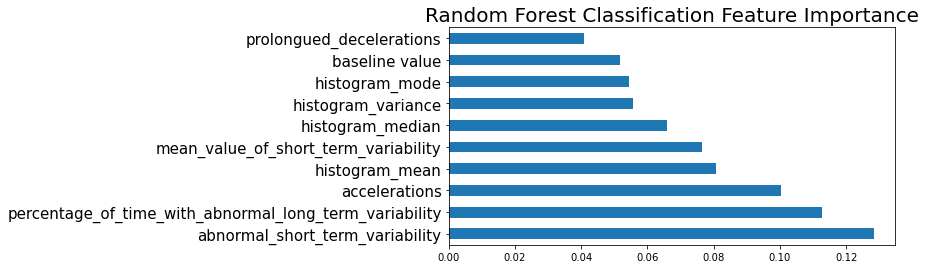

In [27]:
#BEST MODEL
RandomForest = RandomForestClassifier(random_state=42)
RandomForest.fit(X_train_ada, y_train_ada)
(panda.Series(RandomForest.feature_importances_, index=X.columns)
    .nlargest(10)
    .plot(kind='barh', figsize=[8,4]))

plt.yticks(size=15)
plt.title('Random Forest Classification Feature Importance', size=20)